## Defing Function Calling

### OpenAI's tools
- Can be used to return more specific information
- Can define a more precise structure
- Enhances the capabilities of the API call

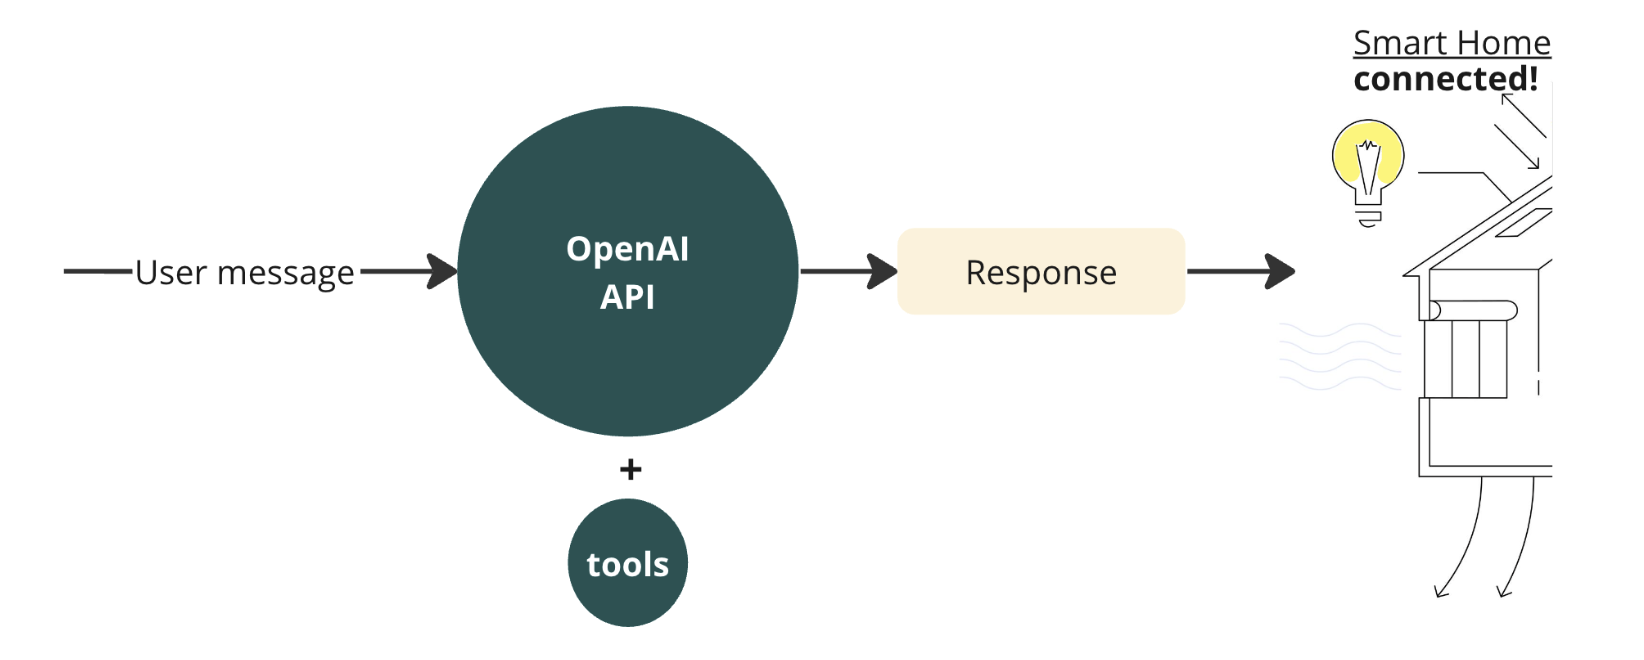

### What is function calling?

In [ ]:
response = client.chat.completions.create( 
    model="gpt-4o-mini",  
    messages=[  
        {"role": "user", "content": "Please write down four trees with their scientific names in json."} 
    ], 
    response_format={"type": "json_object"})

print(response.choices[0].message.content)

### Why use function calling?
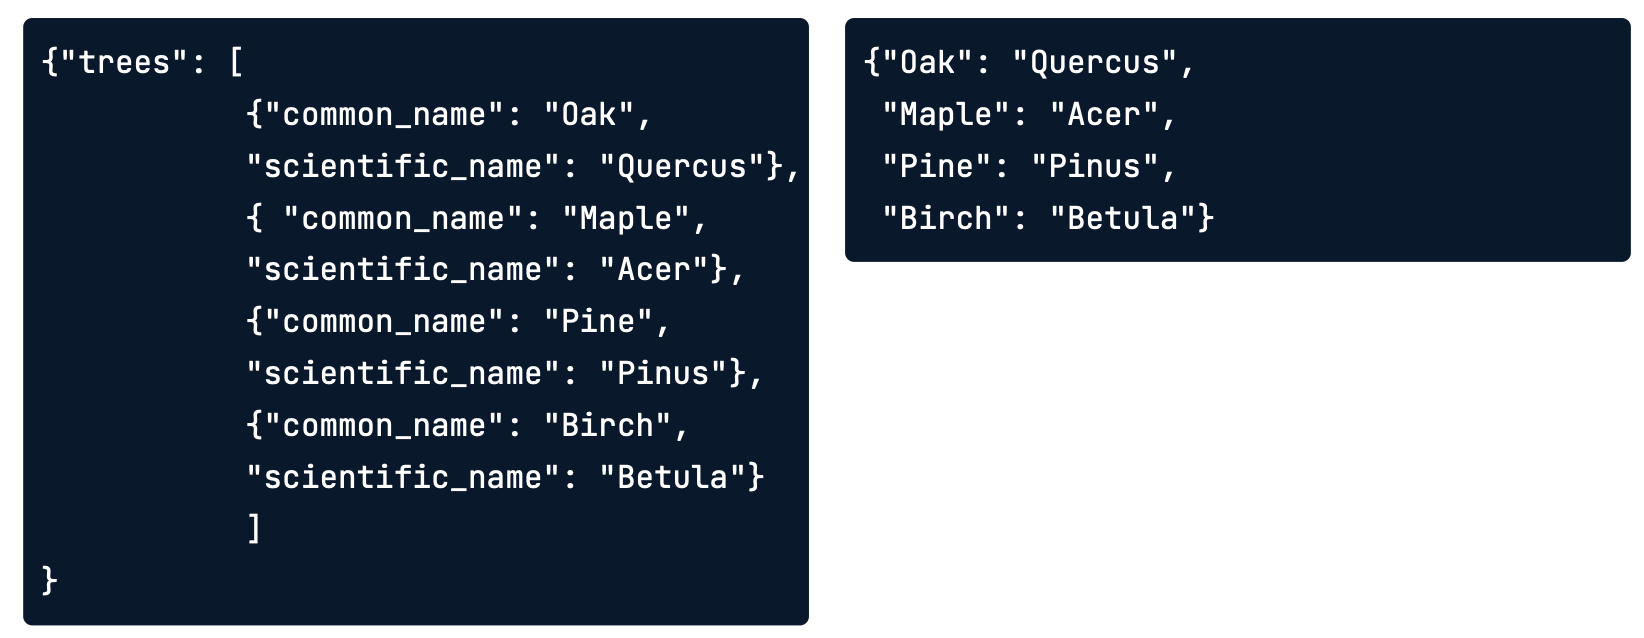

### Use cases for function calling
- Going from unstructured to consistent structured output
- Calling multiple functions to provide complex responses
- Calling external APIs

## Extracting Structured Data from Text

### Implementing function calling
- Sample Text:
"We are currently seeking a highly skilled Data Scientist to join our innovative team atthe company's headquarters in San Francisco, CA. In this role, you will have the opportunity to work on complex data analysis andmodeling projects that drive our strategic decisions. Requirements: Minimum 3 years ofexperience in data science with Python and AWS, Azure or GCP."

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="ENTER YOUR KEY HERE")

response= client.chat.completions.create(   
    model="gpt-4o-mini",    
    messages=messages,   
    tools=function_definition,
)

In [ ]:
# Setting up function calling

function_definition = [{
    'type': 'function',
    'function': {
        'name': 'extract_job_info',
        'description': 'Get the job information from the body of the input text',
        'parameters': {            ...            }   
    }]

# 2nd phase

function_definition = [{
    'type': 'function',
    'function': {
        'name': 'extract_job_info',
        'description': 'Get the job information from the body of the input text',
        'parameters': {'type': 'object',
                       'properties': 'job': {'type': 'string',
                                             'description': 'Job title'},
                       'location': {'type': 'string',
                                    'description': 'Office location'}, 
                       ...           
                      }   
    }]

In [ ]:
# Response

response= client.chat.completions.create(   
    model="gpt-4o-mini",   
    messages=messages,   
    tools=function_definition
)

print(response.choices[0].message.tool_calls[0].function.arguments)

In [ ]:
# Practice 1

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response= client.chat.completions.create(
    model="gpt-4o-mini",
    # Add the message
    messages = message_listing,
    # Add your function definition
    tools = function_definition
)

# Print the response
print(response.choices[0].message.tool_calls[0].function.arguments)

In [ ]:
# Practice 2

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the function parameter type
function_definition[0]['function']['parameters']['type'] = "object"

# Define the function properties
function_definition[0]['function']['parameters']['properties'] = {
    "title": {
        "type": "string",
        "description": "The title of the research paper"
    },
    "year": {
        "type": "string",
        "description": "The year the research paper was published"
    }
}

response = get_response(messages, function_definition)
print(response)

In [ ]:
# Practice 3

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = get_response(messages, function_definition)

# Define the function to extract the data dictionary
def extract_dictionary(response):
  return response.choices[0].message.tool_calls[0].function.arguments

# Print the data dictionary
print(extract_dictionary(response))

## Working with Multiple Functions

### Parallel function calling
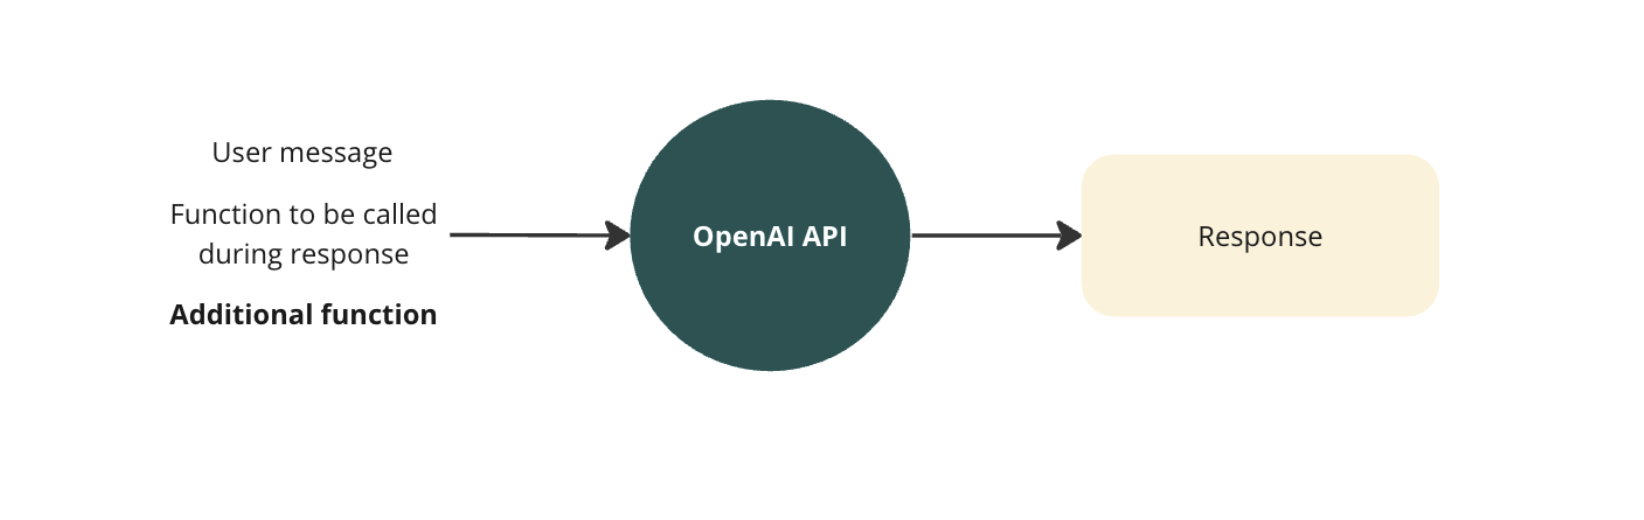

### Example message

In [ ]:
function_definition = [{
    'type': 'function',
    'function': {
        'name': 'extract_job_info',
        'description': 'Get the job information from the body of the input text',
        'parameters': {'type': 'object',
                       'properties': {
                           'job': {'type': 'string', 'description': 'Job title'},
                           'location': {'type': 'string', 'description': 'Location'}}        
                      }}   
}]

function_definition.append({
    'type': 'function',
    'function':{
        'name': 'get_timezone',
        'description': 'Return the timezone corresponding to the location in the job advert',
        'parameters': {'type': 'object',
                       'properties': {
                           'timezone': {'type': 'string','description': 'Timezone'}}} 
    }  
})

In [ ]:
response = client.chat.completions.create(  
    model="gpt-4o-mini",   
    messages=messages,    
    tools=function_definition
)

### Example Response
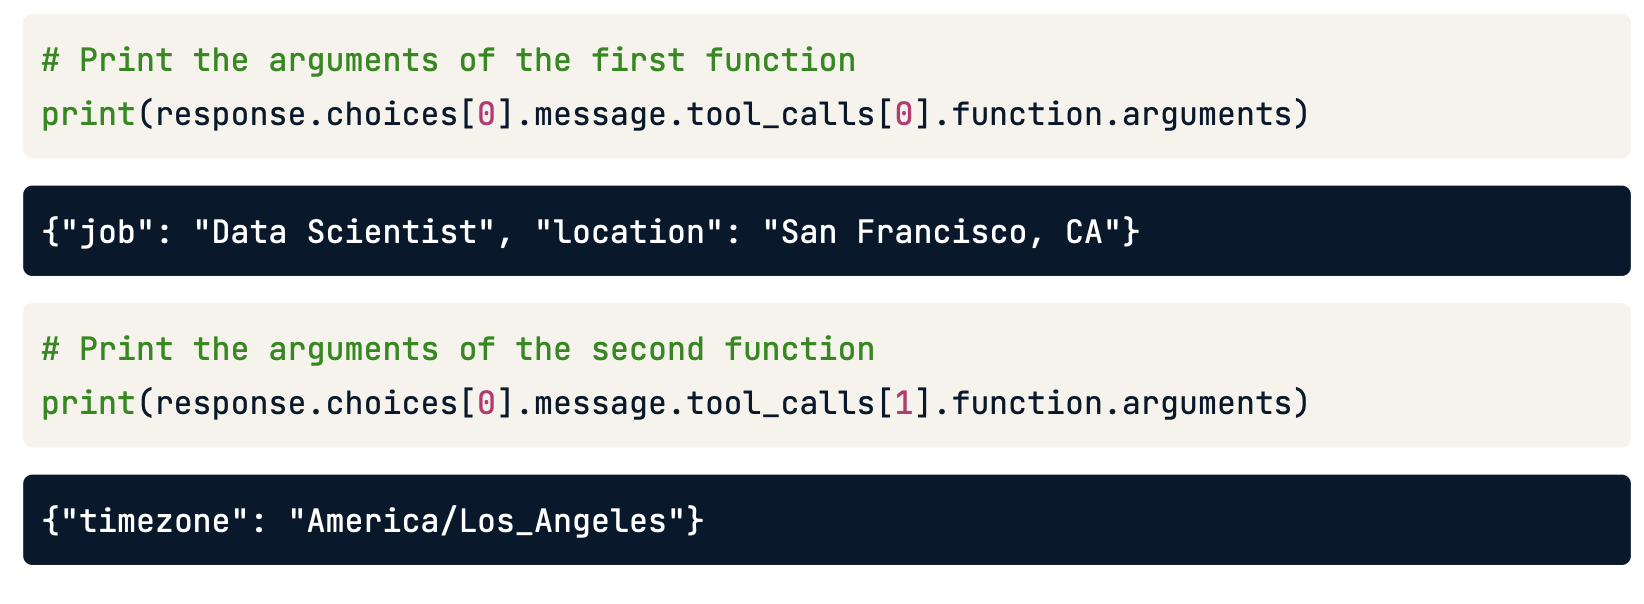

### Setting specific functions

In [ ]:
response = client.chat.completions.create(  
    model="gpt-4o-mini",  
    messages=messages,   
    tools=function_definition,  
    tool_choice='auto'
)

response = client.chat.completions.create(   
    model="gpt-4o-mini",  
    messages=messages,   
    tools=function_definition,   
    tool_choice={'type': 'function',
                 'function': {'name': 'extract_job_info'}    
                }
)

In [ ]:
# Double checking the response

messages = []
messages.append({
    "role": "system", 
    "content": "Don't make assumptions about what values to plug into functions. Don't make up values to fill the response with."
})

messages.append({
    "role": "system", 
    "content": "Ask for clarification if needed."
})

messages.append({"role": "user", 
                 "content": "What is the starting salary for the role?"})

In [ ]:
response = client.chat.completions.create(  
    model="gpt-4o-mini",    
    messages=messages,  
    tools=function_definition
)

print(response.choices[0].message.content)

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Append the second function
function_definition.append({
    'type': 'function',
    'function': {
        'name': 'reply_to_review',
        'description': 'Generate a suitable reply to the customer review.',
        'parameters': {
            'type': 'object',
            'properties': {
                'reply': {
                    'type': 'string',
                    'description': 'The generated reply message to the customer review.'
                }
            }
        }
    }
})

response = get_response(messages, function_definition)

# Print the response
print(response)

In [ ]:
# Practice 5

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response= client.chat.completions.create(
    model=model,
    messages=messages,
    # Add the function definition
    tools = function_definition,
    # Specify the function to be called for the response
    tool_choice={'type': 'function',
                 'function': {'name': 'extract_review_info'}    
                }
)

# Print the response
print(response.choices[0].message.tool_calls[0].function.arguments)

In [ ]:
# Practice 6

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Modify the messages
messages.append({"role": "system", "content": "Don't make assumptions about what values to plug into functions."})

response = get_response(messages, function_definition)

print(response)

## Calling External APIs

### Python requests library for APIs
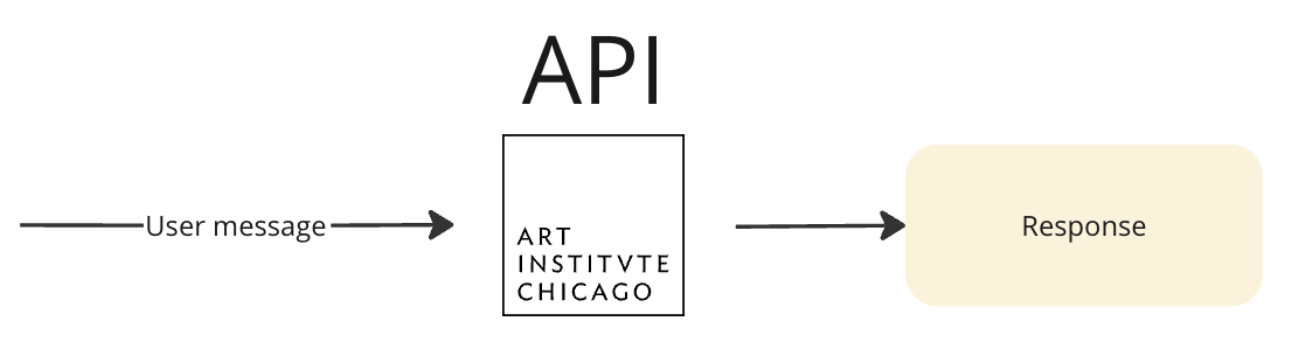

In [ ]:
# Import the library
import requests

# Provide a URL
url = "https://api.artic.edu/api/v1/artworks/search"

# Provide query parameters
querystring = {"q":keyword}

# Get the response
response = requests.request("GET", url, params=querystring)

In [ ]:
# Packaging the function

import requests

def get_artwork(keyword):   
    url = "https://api.artic.edu/api/v1/artworks/search"   
    querystring = {"q":keyword}    
    response = requests.request("GET", url, params=querystring)
    return response.text

In [ ]:
# Adding context

response = client.chat.completions.create(   
    model="gpt-4o-mini",   
    messages=[{"role": "system",
               "content": """You are an AI assistant, a specialist in history of art. 
               You should interpret the user prompt, and based on it extract one    
               keyword for recommending artwork related to their preference."""},
              {"role": "user", 
               "content": """I don't have much time to visit the museum and would  
               like some recommendations. I like the seaside and quiet places."""
              }],

In [ ]:
# Adding functions as tools

function_definition=[{
    "type": "function",
    "function" : {
        "name": "get_artwork",
        "description": """This function calls the Art Institute of Chicago API 
        to find artwork that matches a keyword""",
        "parameters": {
            "type": "object",
            "properties": {"artwork keyword": {
                "type": "string",
                "description": "The keyword to be passed to the get_artwork function."}}},
        "result": {"type": "string"}      
    }} ] )

In [ ]:
# Bringing it all together

import json

if response.choices[0].finish_reason=='tool_calls':  
    function_call = response.choices[0].message.tool_calls[0].function
    if function_call.name == "get_artwork":       
        artwork_keyword = json.loads(function_call.arguments)["artwork keyword"]     
        artwork = get_artwork(artwork_keyword)
        if artwork:
            print(f"Here are some recommendations: {[i['title'] for i in json.loads(artwork)['data']]}")
        else:
            print("Apologies, I couldn't make any recommendations based on the request.")
        else:
        print("Apologies, I couldn't find any artwork.")
else:
    print("I am sorry, but I could not understand your request.")

### Final response
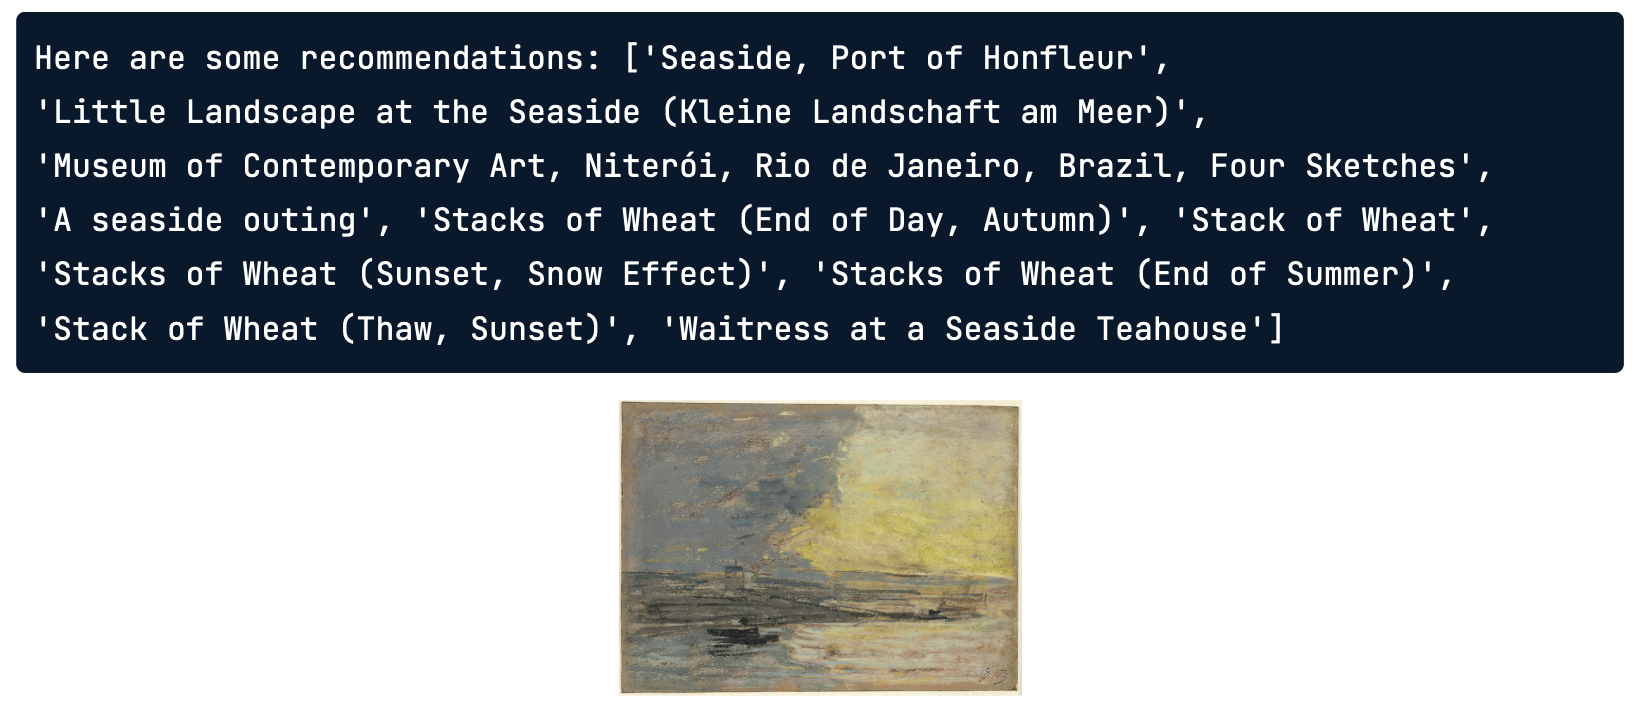

In [ ]:
# Practice 7

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the function to pass to tools
function_definition = [{
    "type": "function",
    "function": {
        "name": "get_airport_info",
        "description": "Return a matching airport code using the AviationAPI.",
        "parameters": {
            "type": "object",
            "properties": {
                "airport_code": {
                    "type": "string",
                    "description": "The IATA or ICAO airport code to look up."
                }
            },
            "required": ["airport_code"]
        },
        "result": {
            "type": "string"
        }
    }
}]

response = get_response(function_definition)
print(response)

In [ ]:
# Practice 8

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Call the Chat Completions endpoint 
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "system", "content": "You are an assistant that extracts airport codes and retrieves information using the AviationAPI."},
    {"role": "user", "content": "I'm planning to land a plane in JFK airport in New York and would like to have the corresponding information."}],
  tools=function_definition)

print_response(response)

In [ ]:
# Practice 9

if response.choices[0].finish_reason=='tool_calls':
  function_call = response.choices[0].message.tool_calls[0].function
  # Check function name
  if function_call.name == "get_airport_info":
    # Extract airport code
    code = json.loads(function_call.arguments)["airport code"] 
    airport_info = get_airport_info(code)
    print(airport_info)
  else:
    print("Apologies, I couldn't find any airport.")
else: 
  print("I am sorry, but I could not understand your request.")